In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Ecommerce_sales.csv')
df.head()

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1


In [3]:
a=df['Category'].value_counts()
a

Category
Electronics       217
Books             209
Home & Kitchen    193
Beauty            192
Clothing          189
Name: count, dtype: int64

# Sales by Category

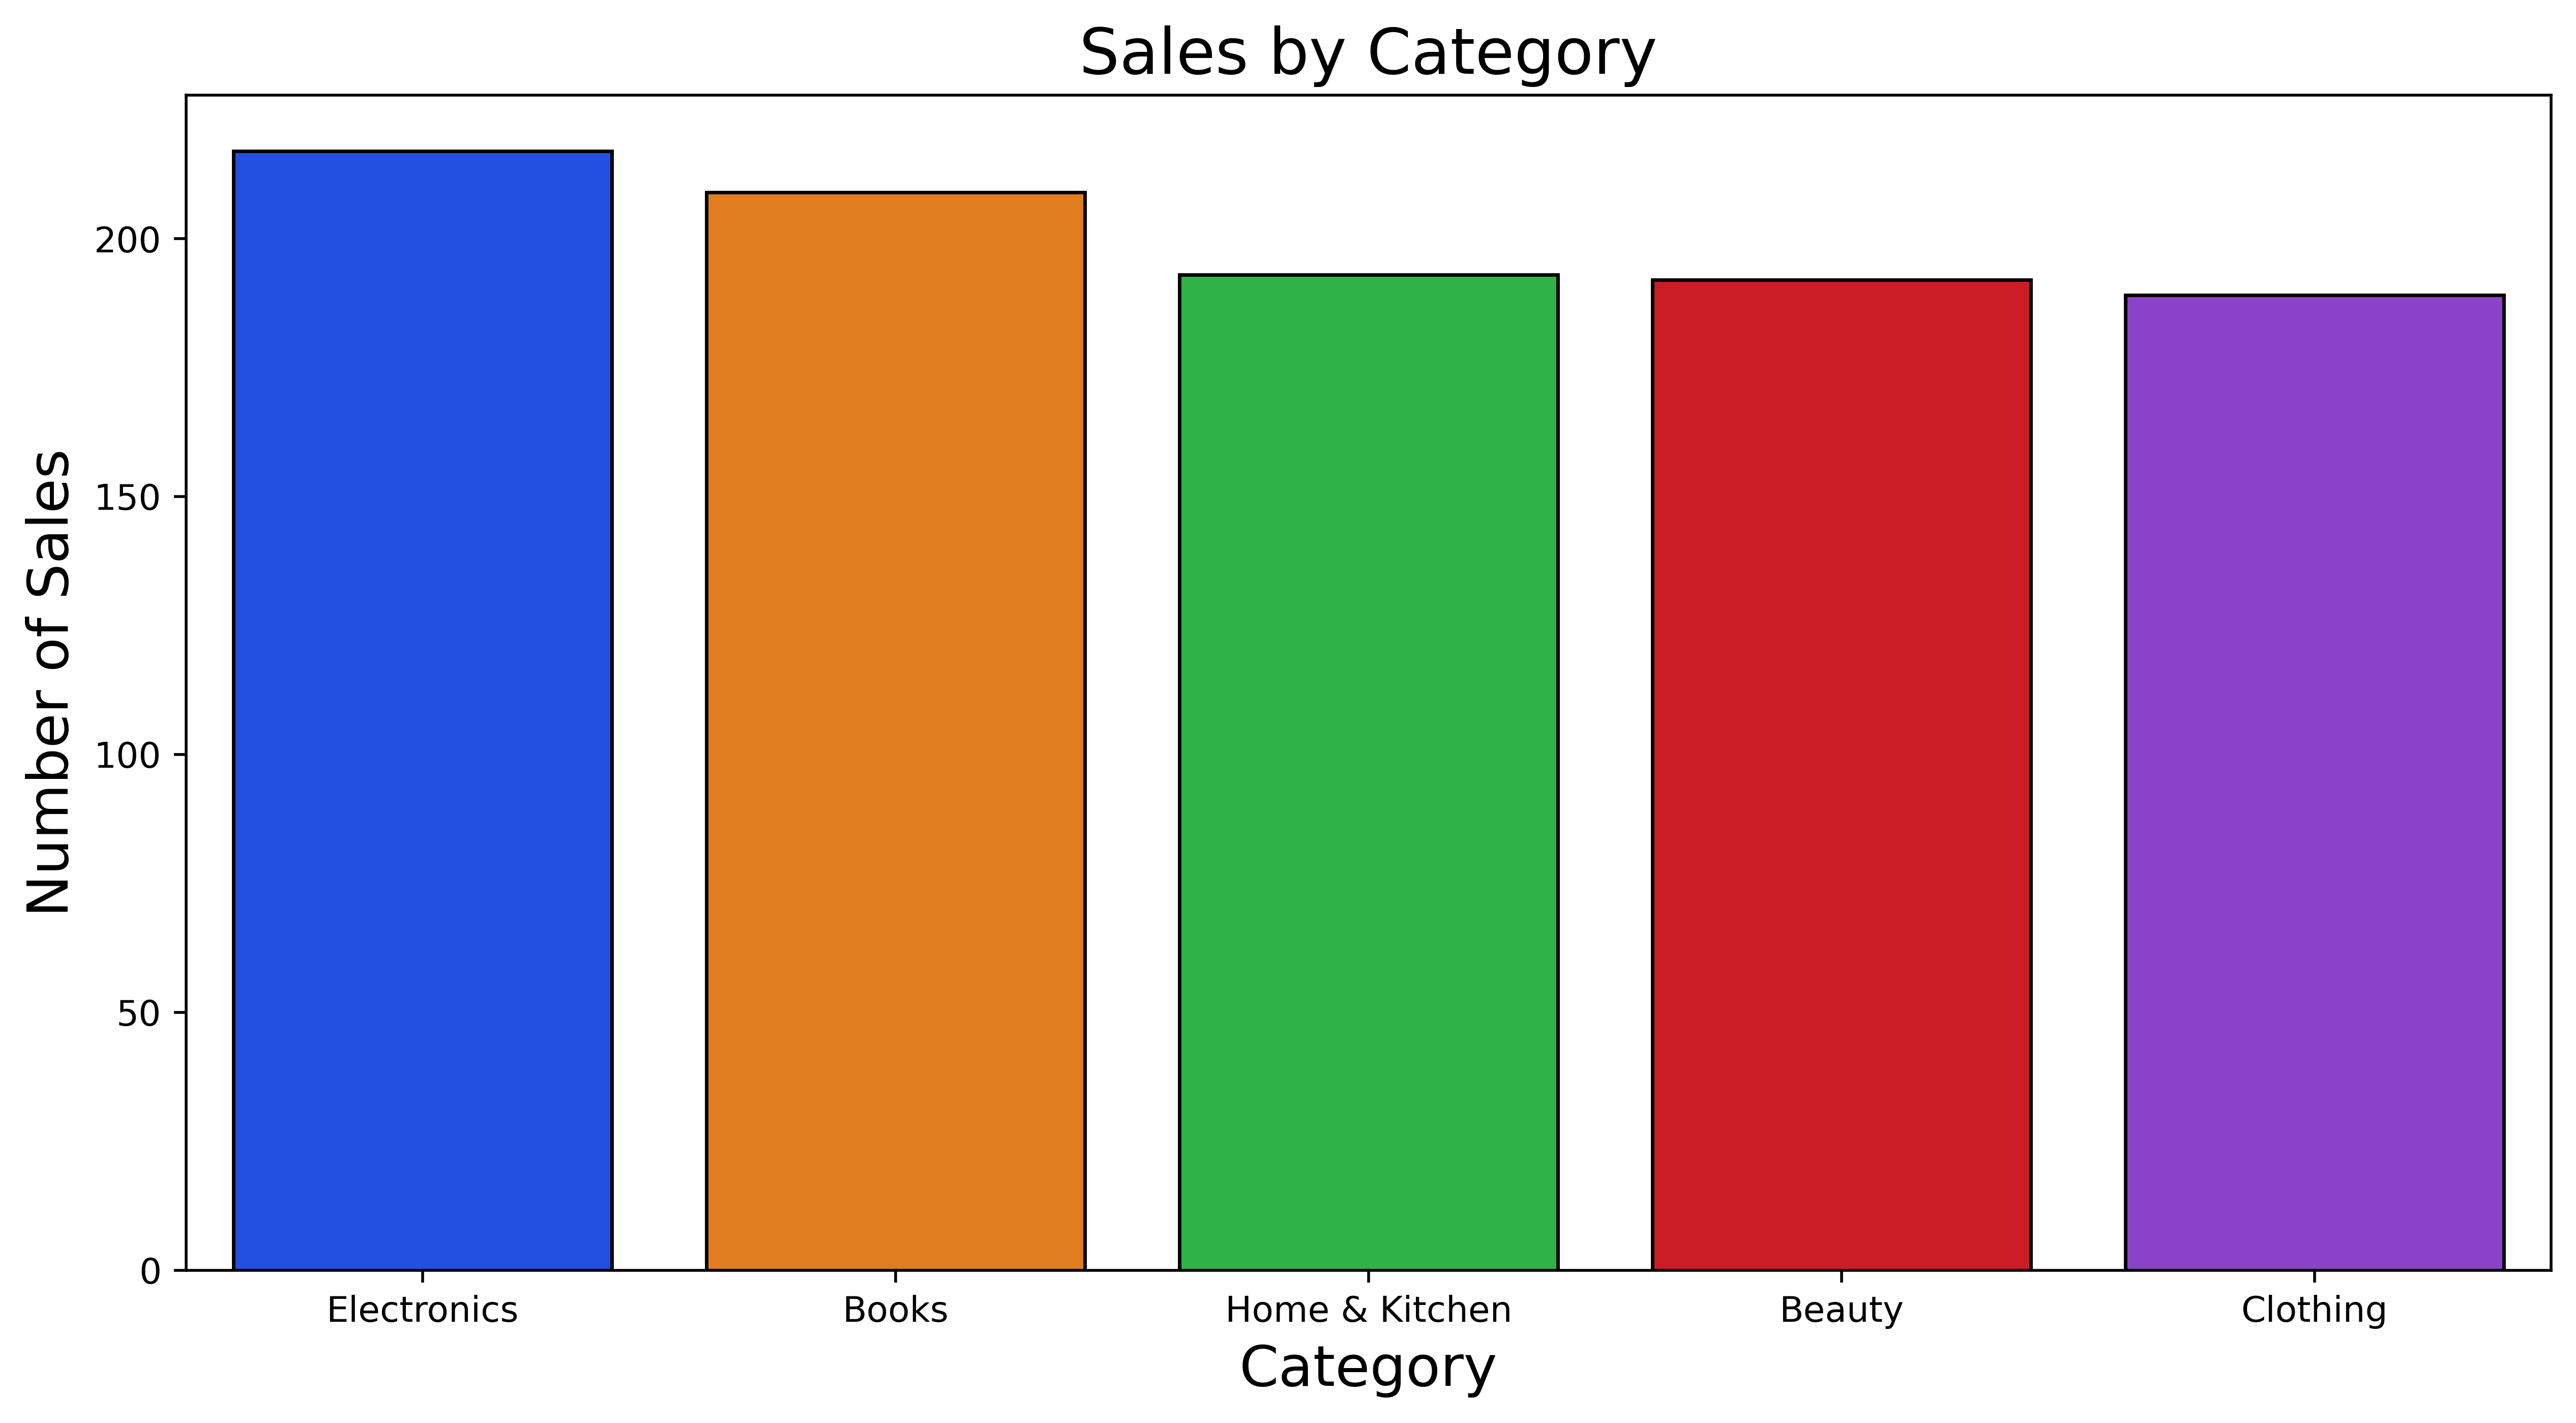

In [29]:
plt.figure(figsize=(12,6),dpi=500)
sns.barplot(x=a.index, y=a.values, palette='bright', edgecolor='black')
plt.title('Sales by Category', fontsize=18)
plt.xlabel('Category',fontsize=16)
plt.ylabel('Number of Sales',fontsize=16);

In [5]:
b=df['Product Name'].value_counts()
b

Product Name
Educational Book    64
Laptop              48
Smartwatch          47
Table Lamp          46
Lipstick            44
Headphones          44
Jeans               42
Sofa Cover          41
Fiction Novel       41
T-Shirt             41
Smartphone          40
Perfume             40
Cookware Set        40
Comic Book          39
Sneakers            39
Tablet              38
Jacket              38
Face Cream          38
Hair Dryer          36
Mixer Grinder       36
Self-Help Book      36
Shampoo             34
Bedsheet            30
Cookbook            29
Dress               29
Name: count, dtype: int64

# Top Product Sold

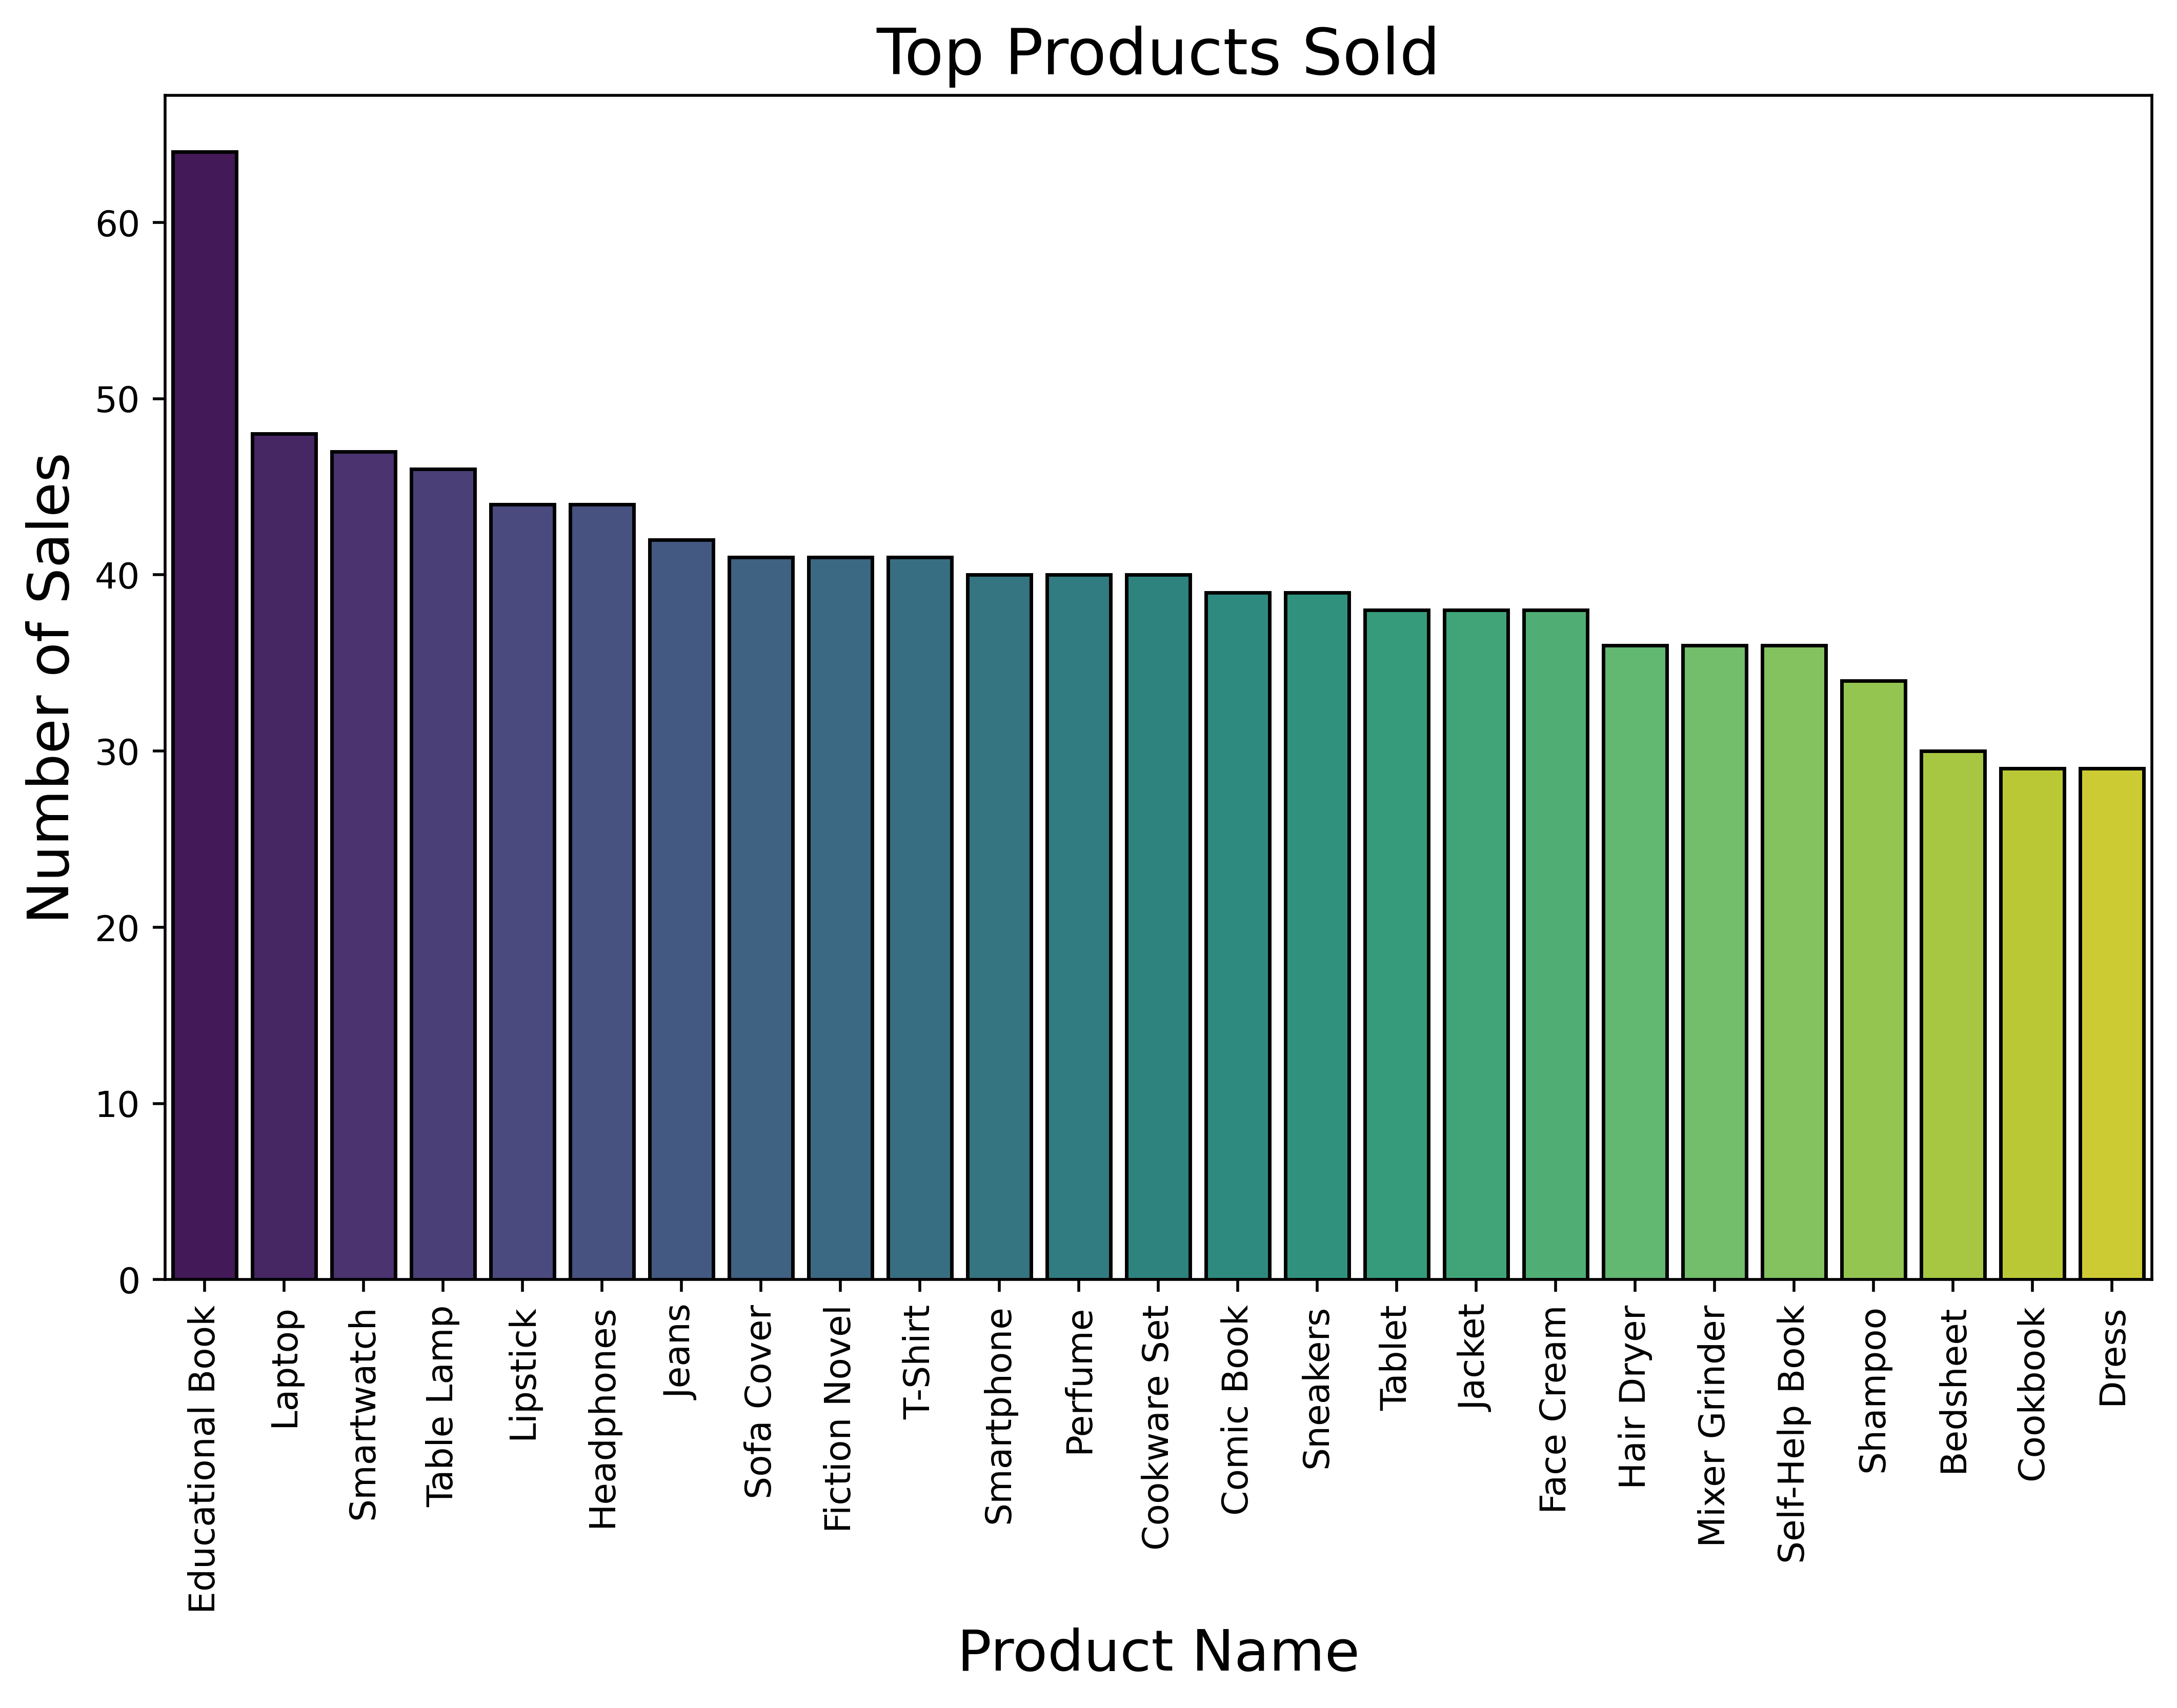

In [30]:
plt.figure(figsize=(10, 6),dpi=500)
sns.barplot(x=b.index, y=b.values, palette='viridis', edgecolor='black')
plt.title('Top Products Sold', fontsize=18)
plt.xlabel('Product Name', fontsize=16)
plt.ylabel('Number of Sales', fontsize=16)
plt.xticks(rotation=90);

In [7]:
c=df['Payment Method'].value_counts()
c

Payment Method
UPI            176
Wallet         172
Debit Card     171
COD            169
Net Banking    166
Credit Card    146
Name: count, dtype: int64

# Payment Method Distribution

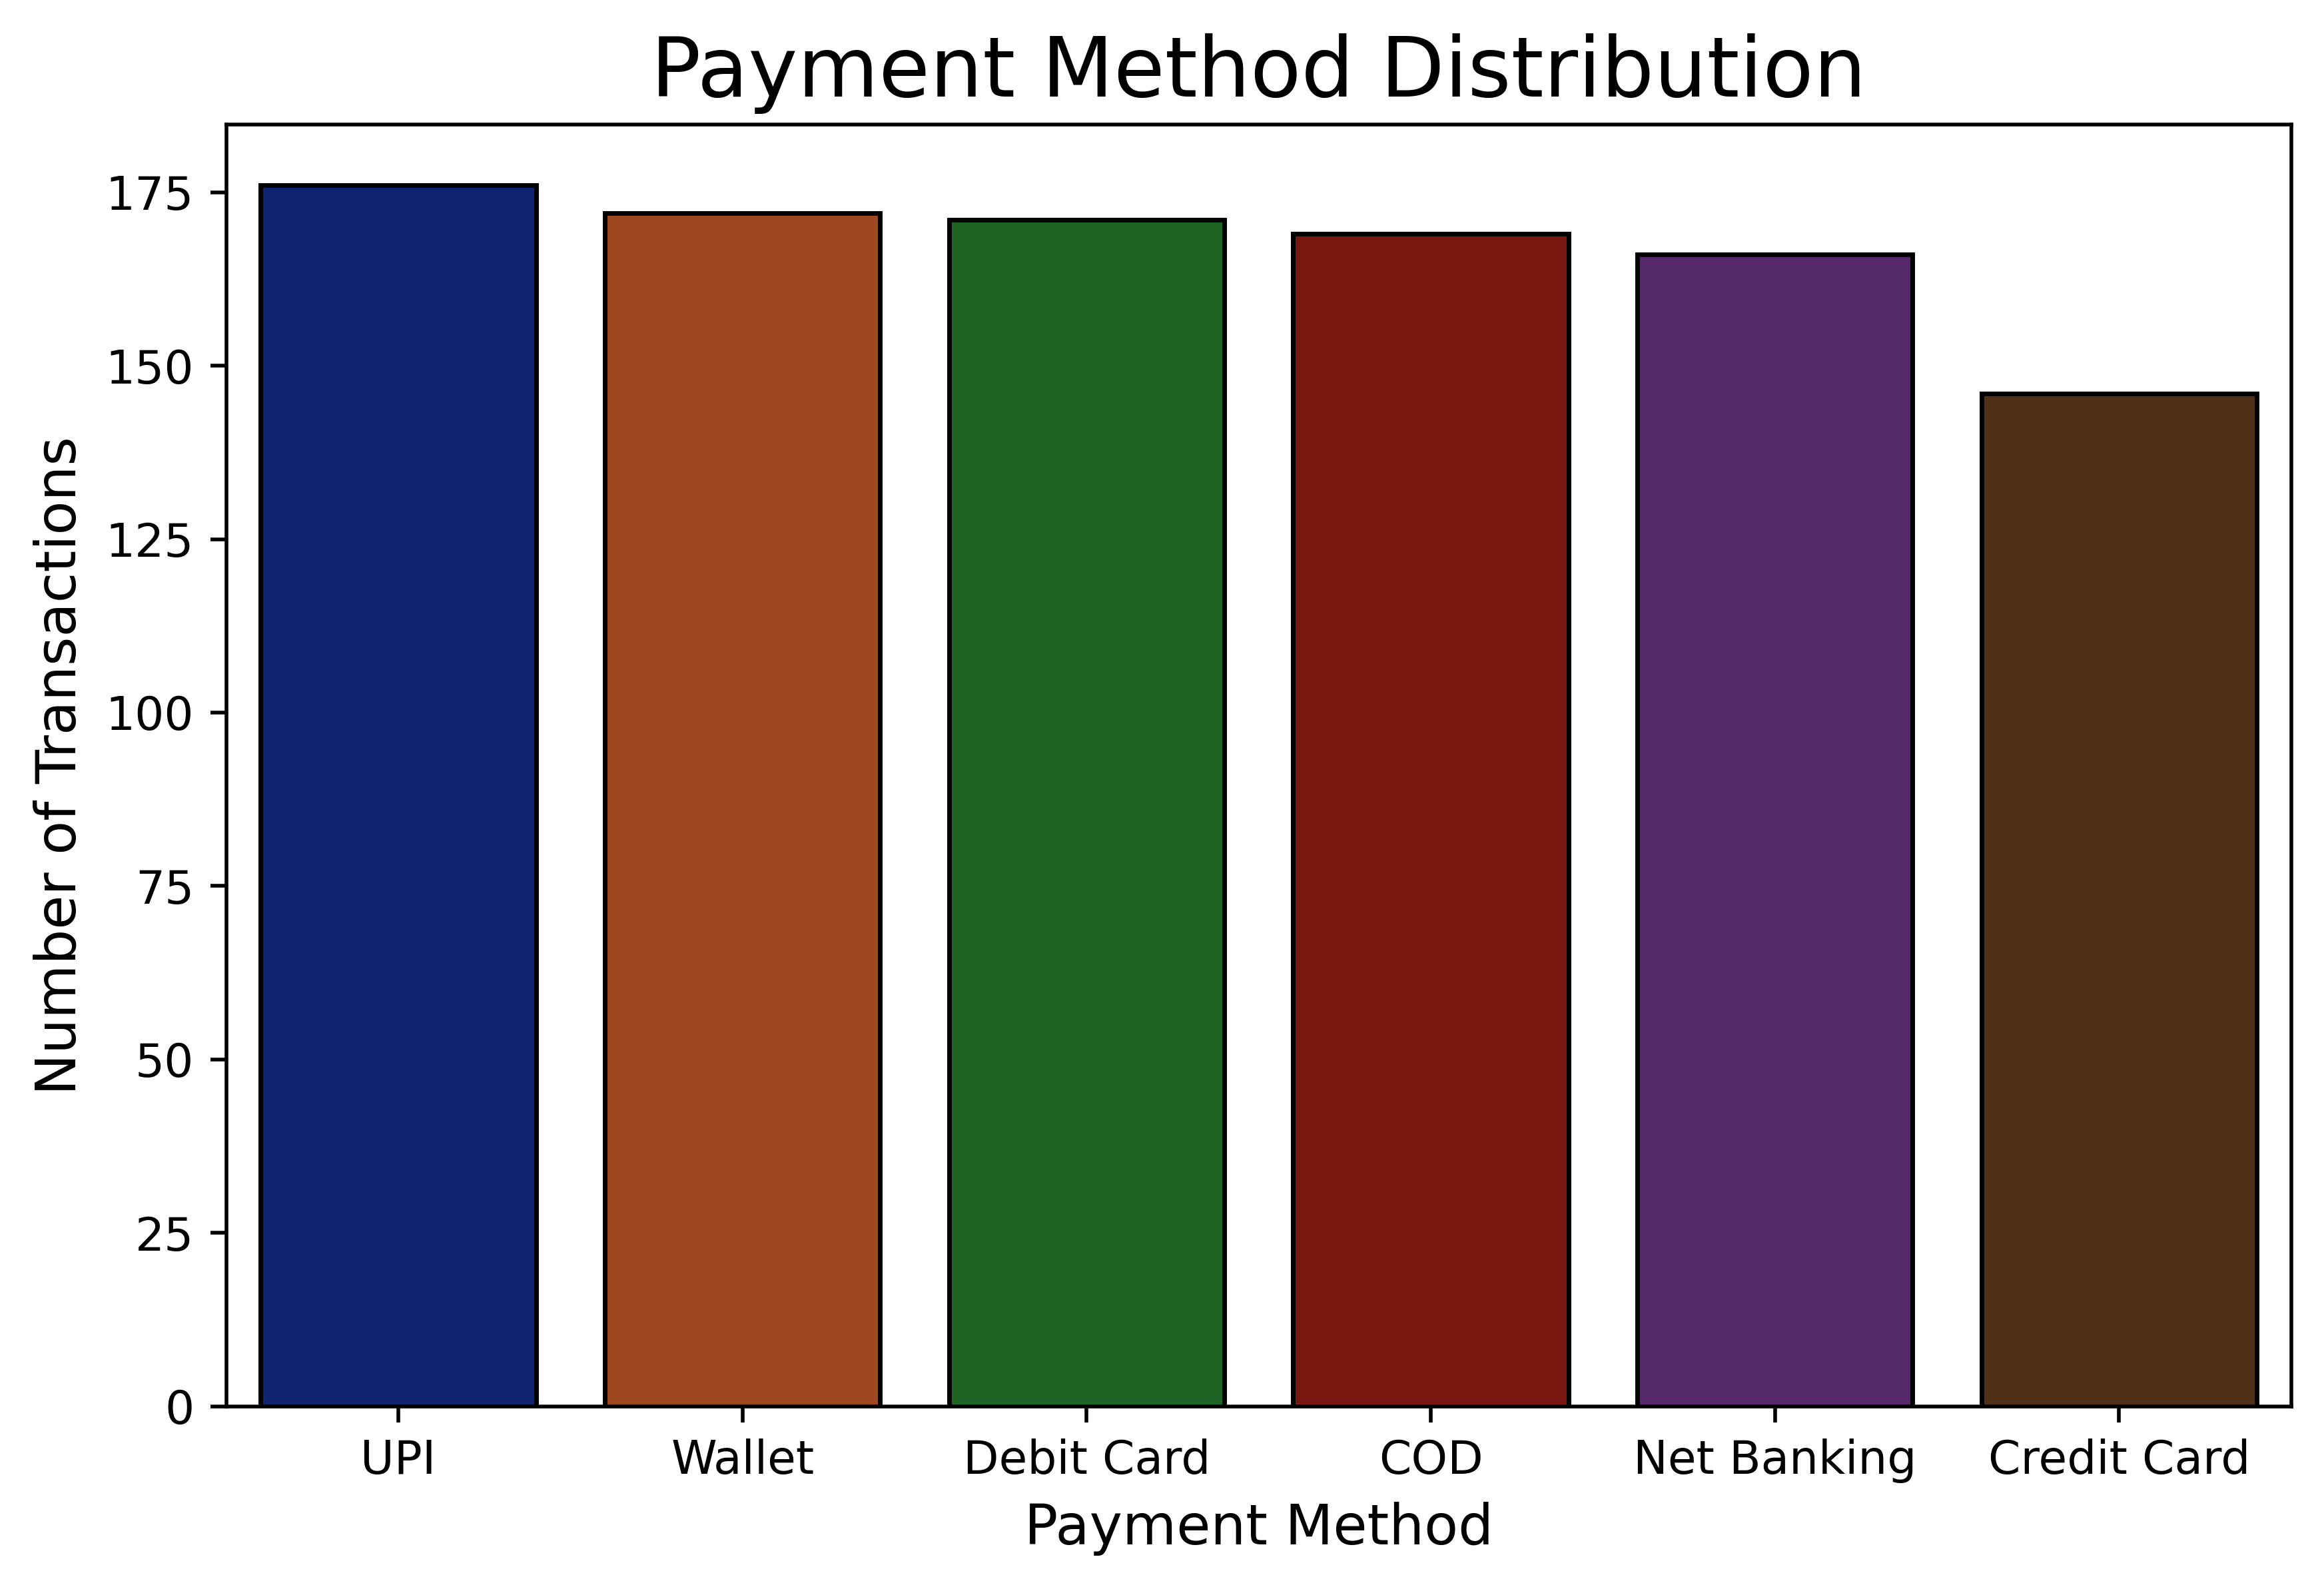

In [32]:
plt.figure(figsize=(8, 5),dpi=500)
sns.barplot(x=c.index, y=c.values, palette='dark',edgecolor='black')
plt.title('Payment Method Distribution', fontsize=18)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12);

In [9]:
df.head()

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1


In [10]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [11]:
df['year']=df['Order Date'].dt.year

In [12]:
d= df['year'].value_counts()
d

year
2024    897
2025    103
Name: count, dtype: int64

# Sales Distribution by Year

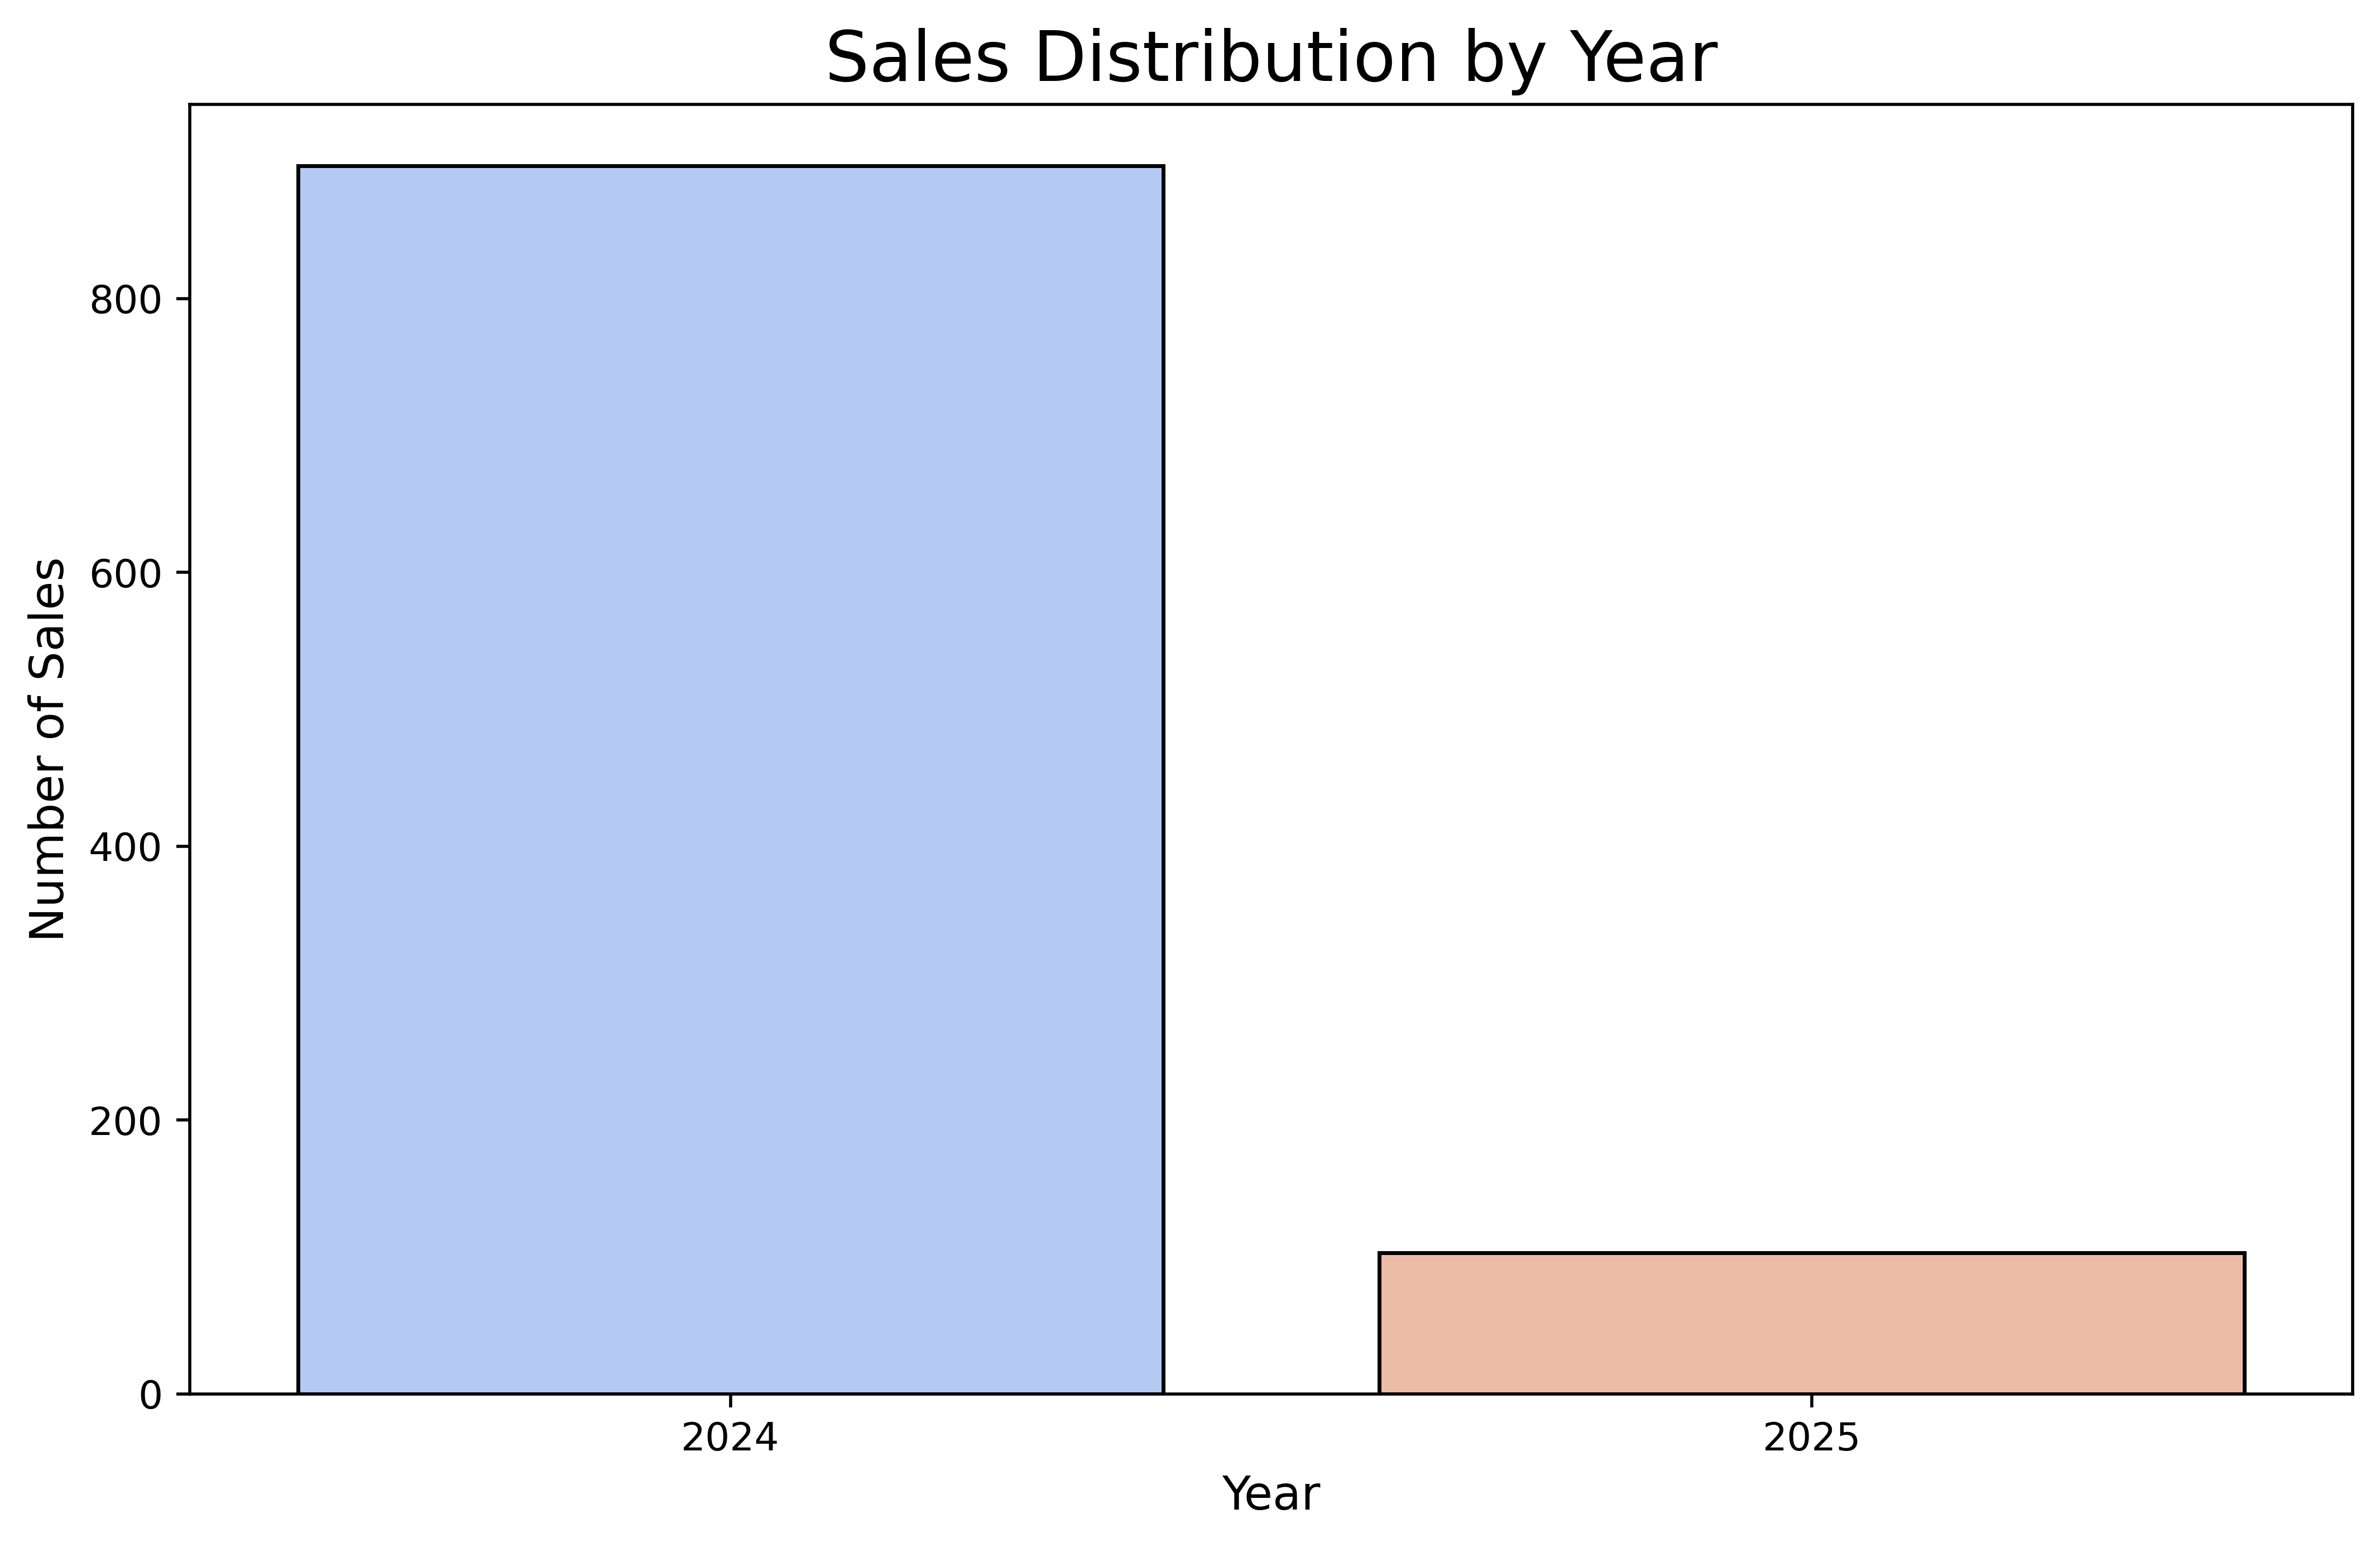

In [33]:
plt.figure(figsize=(10, 6),dpi=500)
sns.barplot(x=d.index, y=d.values,palette='coolwarm',linewidth=1, edgecolor='black') 
plt.title('Sales Distribution by Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12);

In [14]:
df.head()

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating,year
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,2024
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,2024
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,2024
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,2024
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,2024


In [15]:
catogry_sales = df.groupby('Category').agg({'Quantity Sold':'sum', 'Total Sales (INR)':'sum'}).reset_index()
catogry_sales

,Category,Quantity Sold,Total Sales (INR)
0,Beauty,583,14680584.05
1,Books,653,14785759.65
2,Clothing,609,15114386.86
3,Electronics,673,17307173.07
4,Home & Kitchen,579,13325209.11


# Category Wise Quantity Vs Sales

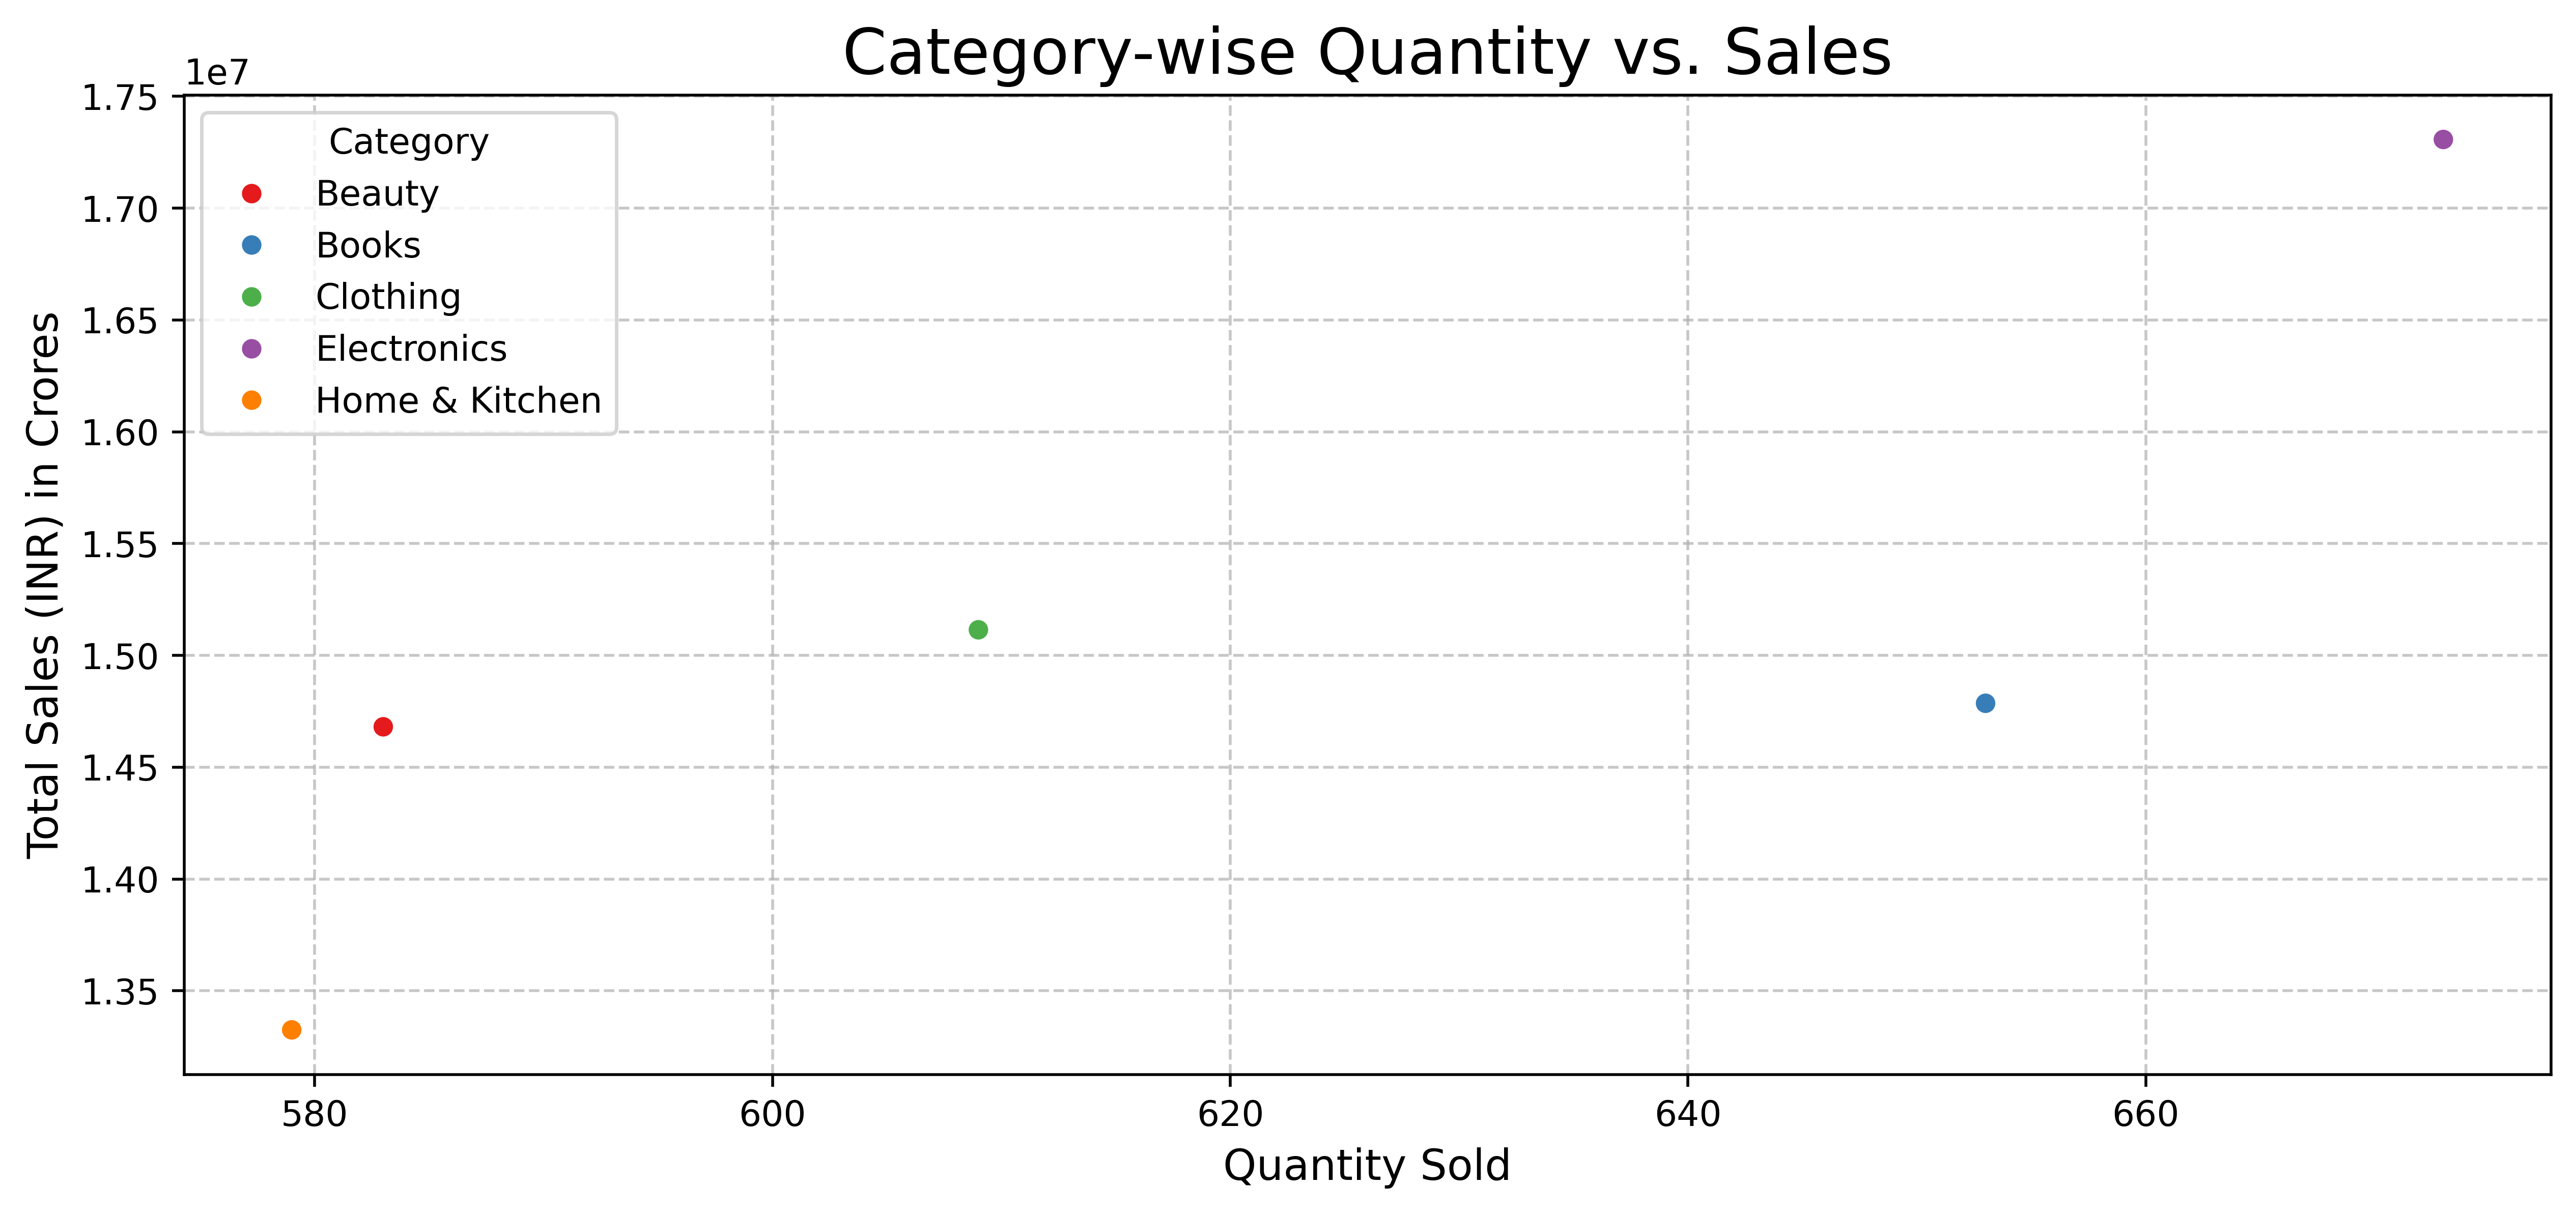

In [39]:
plt.figure(figsize=(12,5),dpi=500)
sns.scatterplot(data=catogry_sales,x='Quantity Sold', y='Total Sales (INR)', hue='Category', palette='Set1')
plt.title('Category-wise Quantity vs. Sales', fontsize=18)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Total Sales (INR) in Crores', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7);
    

## Rating by Category

In [17]:
category_rating= df.groupby('Category')['Customer Rating'].mean().reset_index()
category_rating.sort_values(by='Customer Rating', ascending=False, inplace=True)
category_rating

,Category,Customer Rating
4,Home & Kitchen,3.138860
1,Books,3.079904
3,Electronics,2.988479
2,Clothing,2.971429
0,Beauty,2.872396


# Rating by product

In [18]:
product_rating = df.groupby('Product Name')['Customer Rating'].mean().reset_index()
product_rating.sort_values(by='Customer Rating', ascending=False, inplace=True)
product_rating

,Product Name,Customer Rating
0,Bedsheet,3.713333
1,Comic Book,3.294872
3,Cookware Set,3.235000
19,Smartwatch,3.110638
21,Sofa Cover,3.109756
22,T-Shirt,3.087805
18,Smartphone,3.072500
15,Perfume,3.072500
2,Cookbook,3.068966
24,Tablet,3.068421


# Average Customer Rating by Category

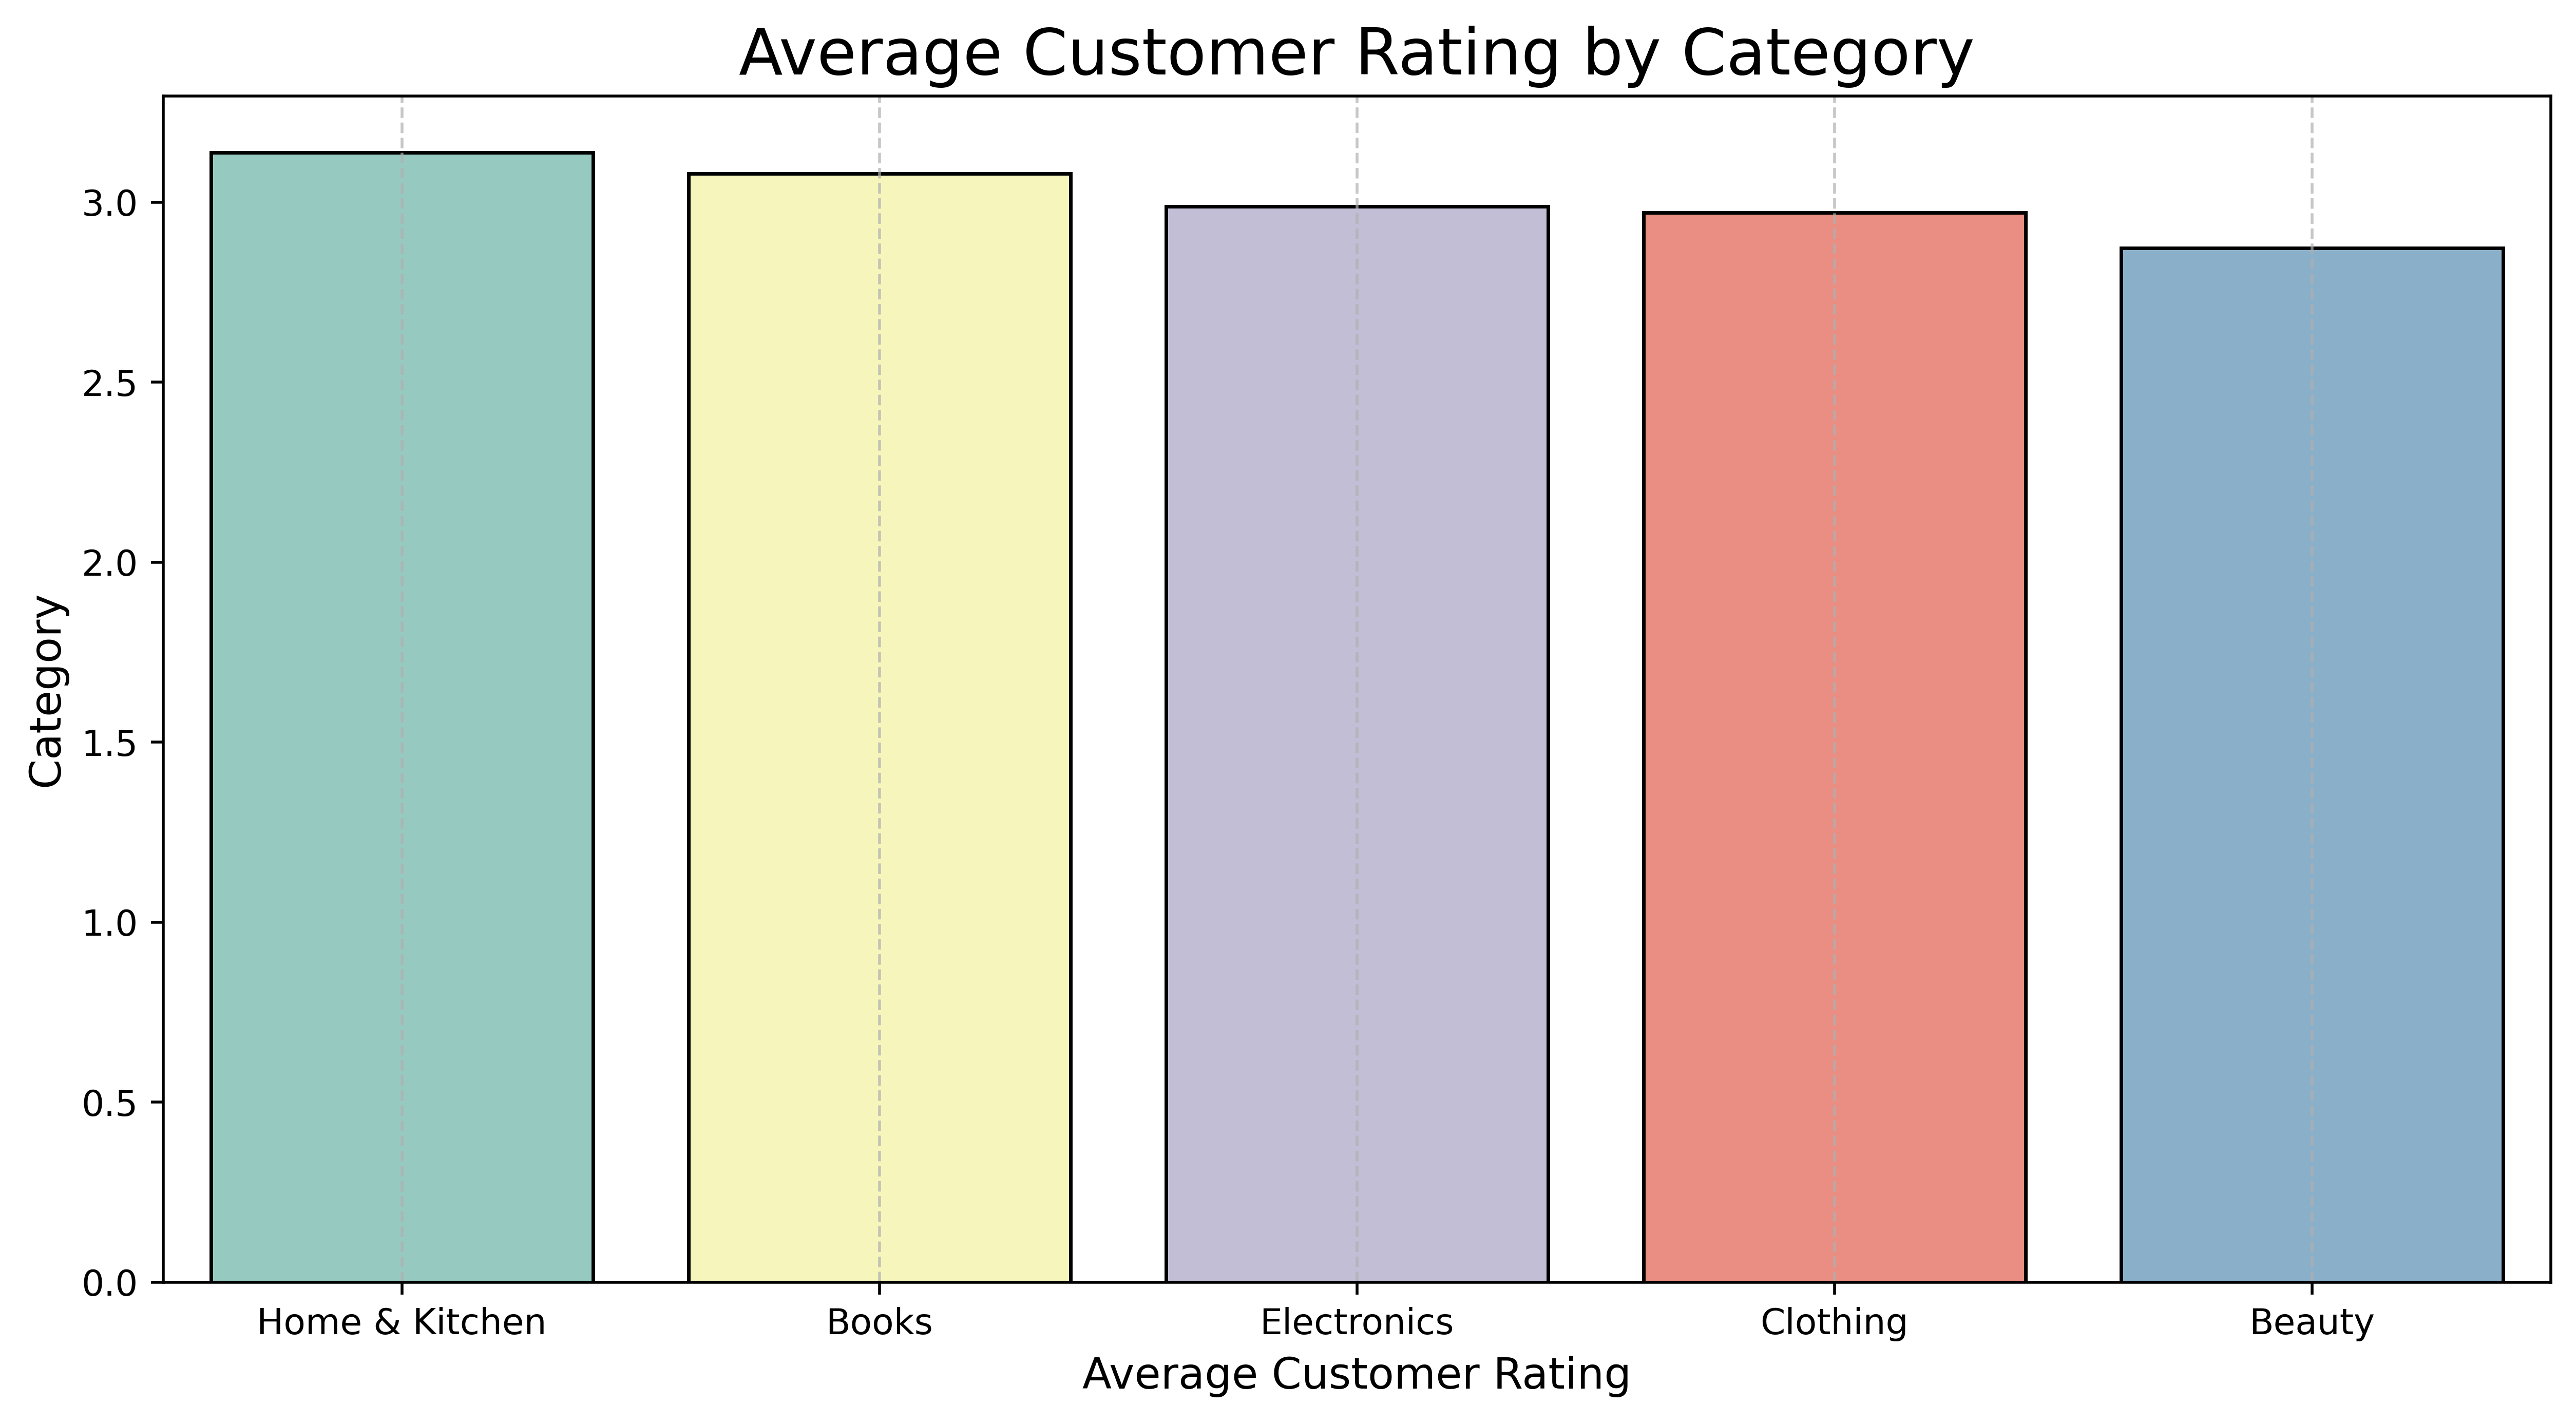

In [40]:
# Creating the Bar Plot: Category-wise average rating
plt.figure(figsize=(12, 6),dpi=500)
sns.barplot(data=category_rating,x='Category' ,y='Customer Rating', palette='Set3', edgecolor='black')
plt.title('Average Customer Rating by Category', fontsize=18)
plt.xlabel('Average Customer Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7);

# Top 10 Products by Average Rating Customer Rating

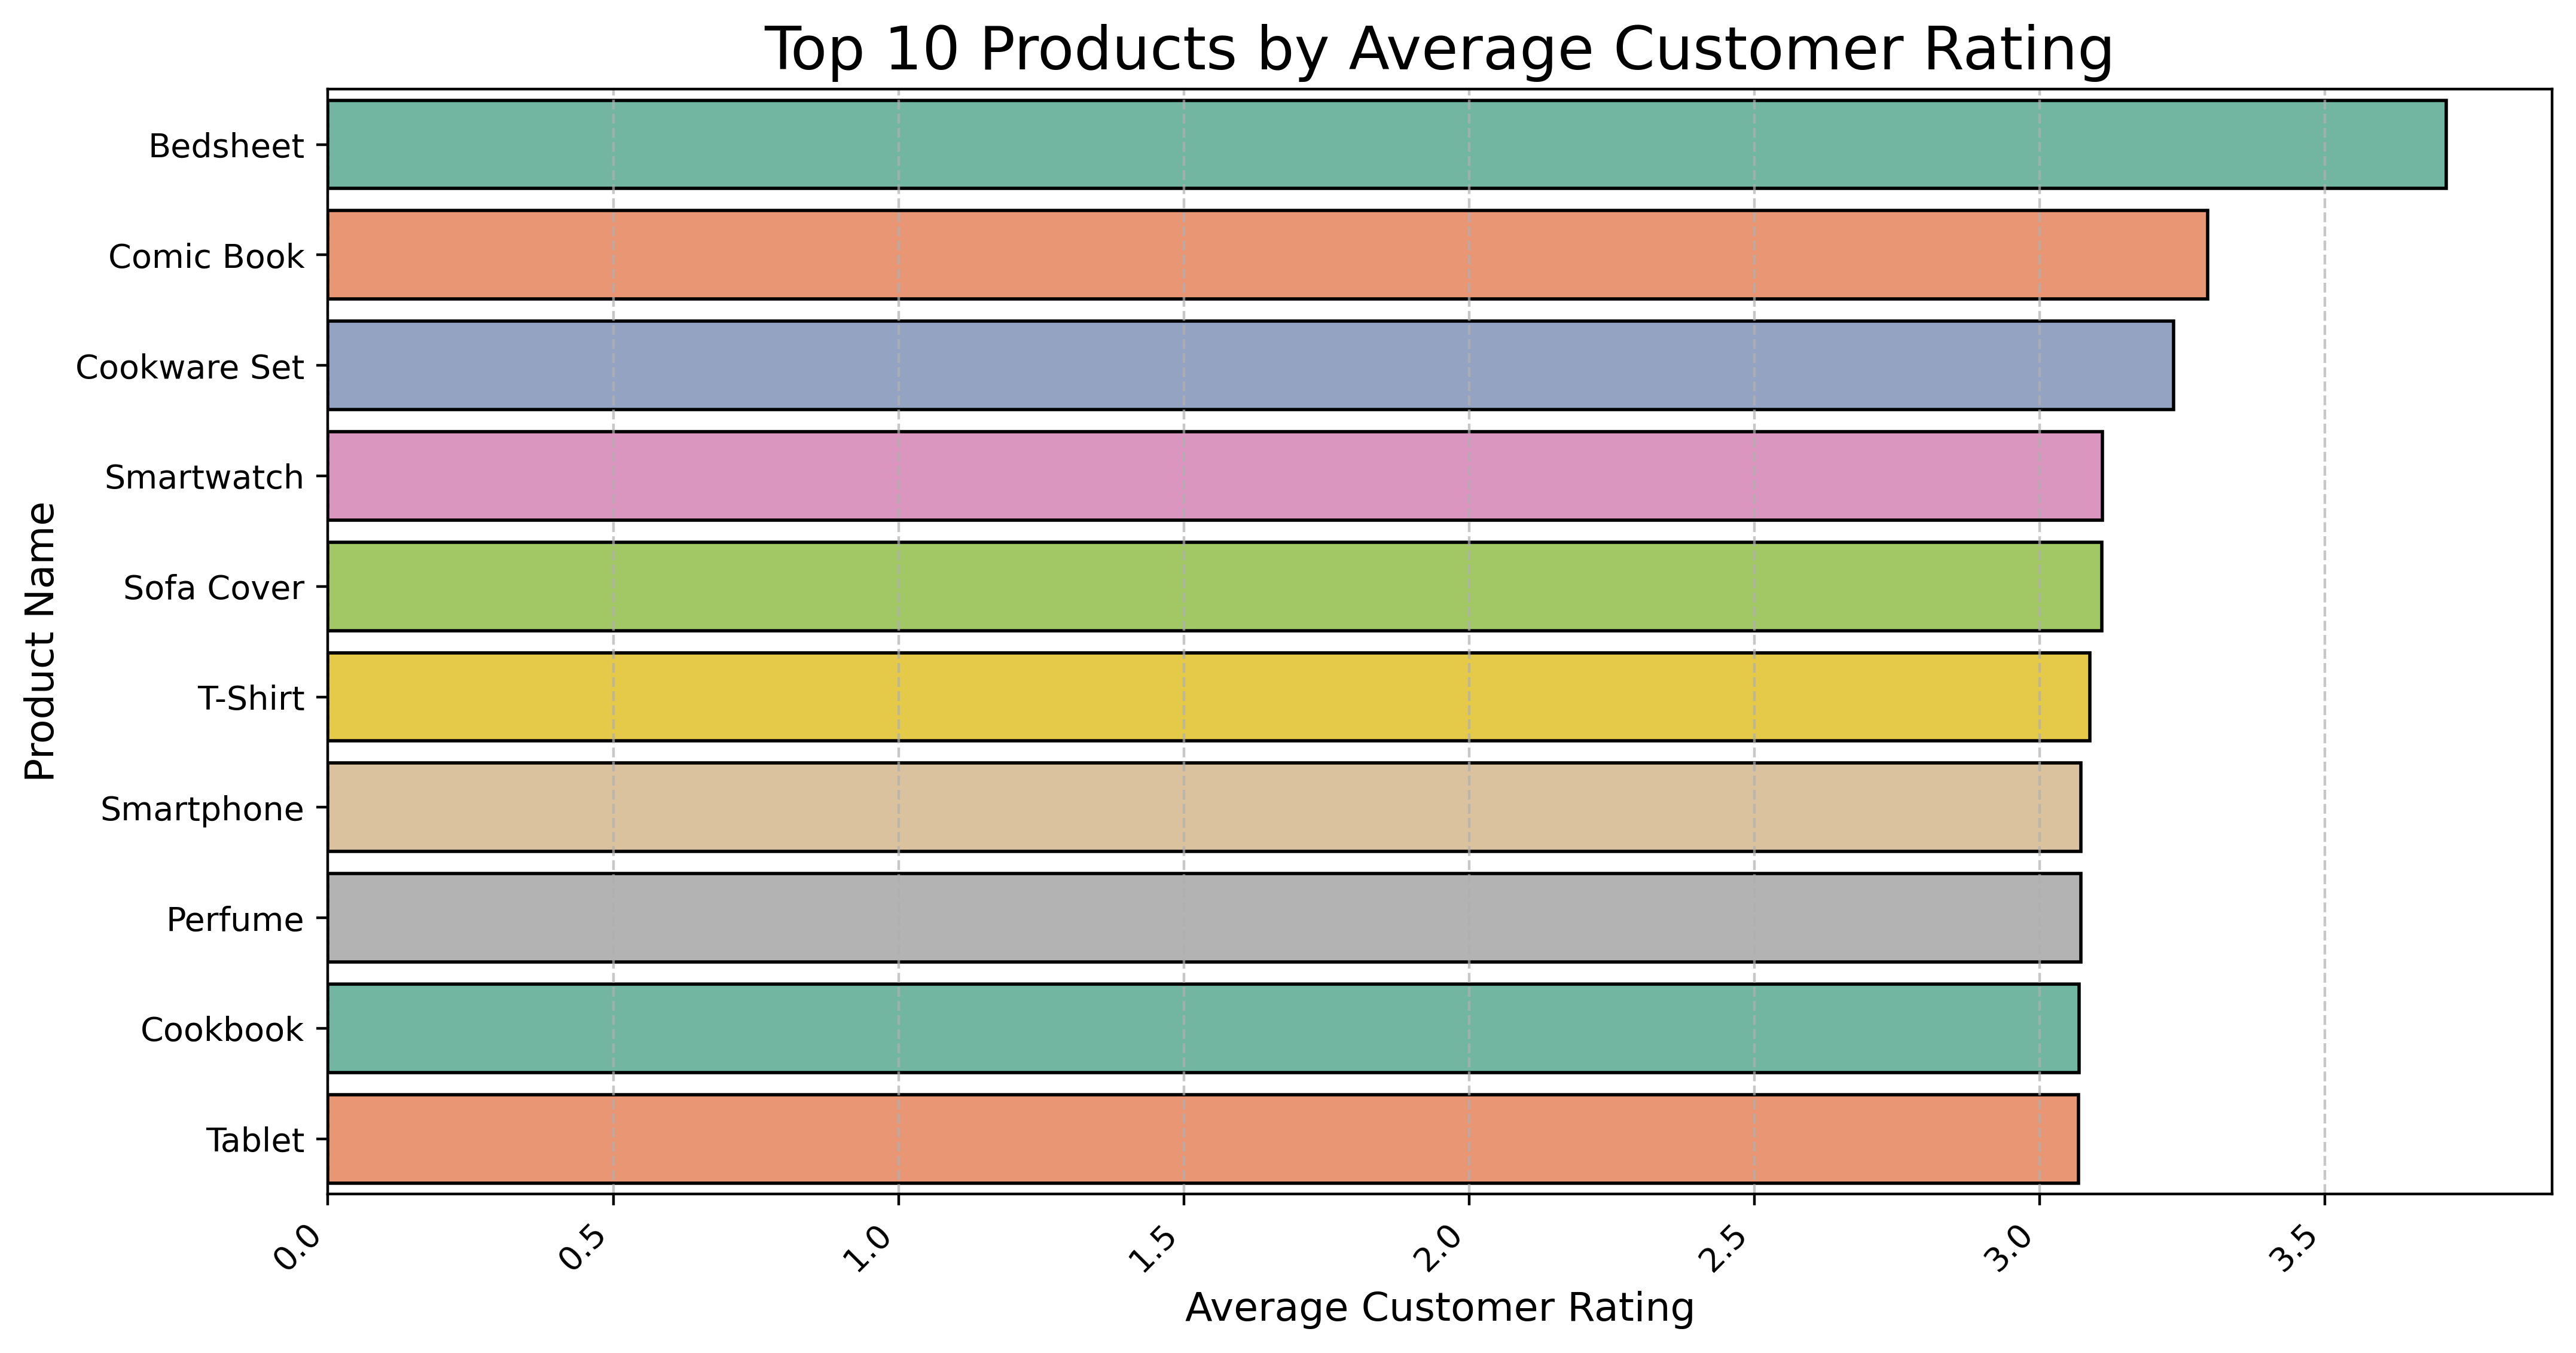

In [41]:
# For Product-wise :Top 10 Average Ratings
top_10_product_rating = product_rating.head(10)
plt.figure(figsize=(12, 6),dpi=400)
sns.barplot(data=top_10_product_rating, x='Customer Rating', y='Product Name', palette='Set2', edgecolor='black')
plt.title('Top 10 Products by Average Customer Rating', fontsize=18)
plt.xlabel('Average Customer Rating', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7);

# Monthly Sales Trend

In [21]:
df['Month'] = df['Order Date'].dt.month_name()
df['Month']

0      September
1       December
2            May
3       November
4       December
         ...    
995      January
996     December
997         July
998      October
999        March
Name: Month, Length: 1000, dtype: object

In [22]:
monthly_sales = df.groupby('Month')['Total Sales (INR)'].sum().reset_index()
monthly_sales

,Month,Total Sales (INR)
0,April,7334962.92
1,August,5418893.98
2,December,6491639.99
3,February,5416573.21
4,January,7160788.17
5,July,7637324.95
6,June,4992364.75
7,March,6508879.04
8,May,6706004.97
9,November,5578535.08


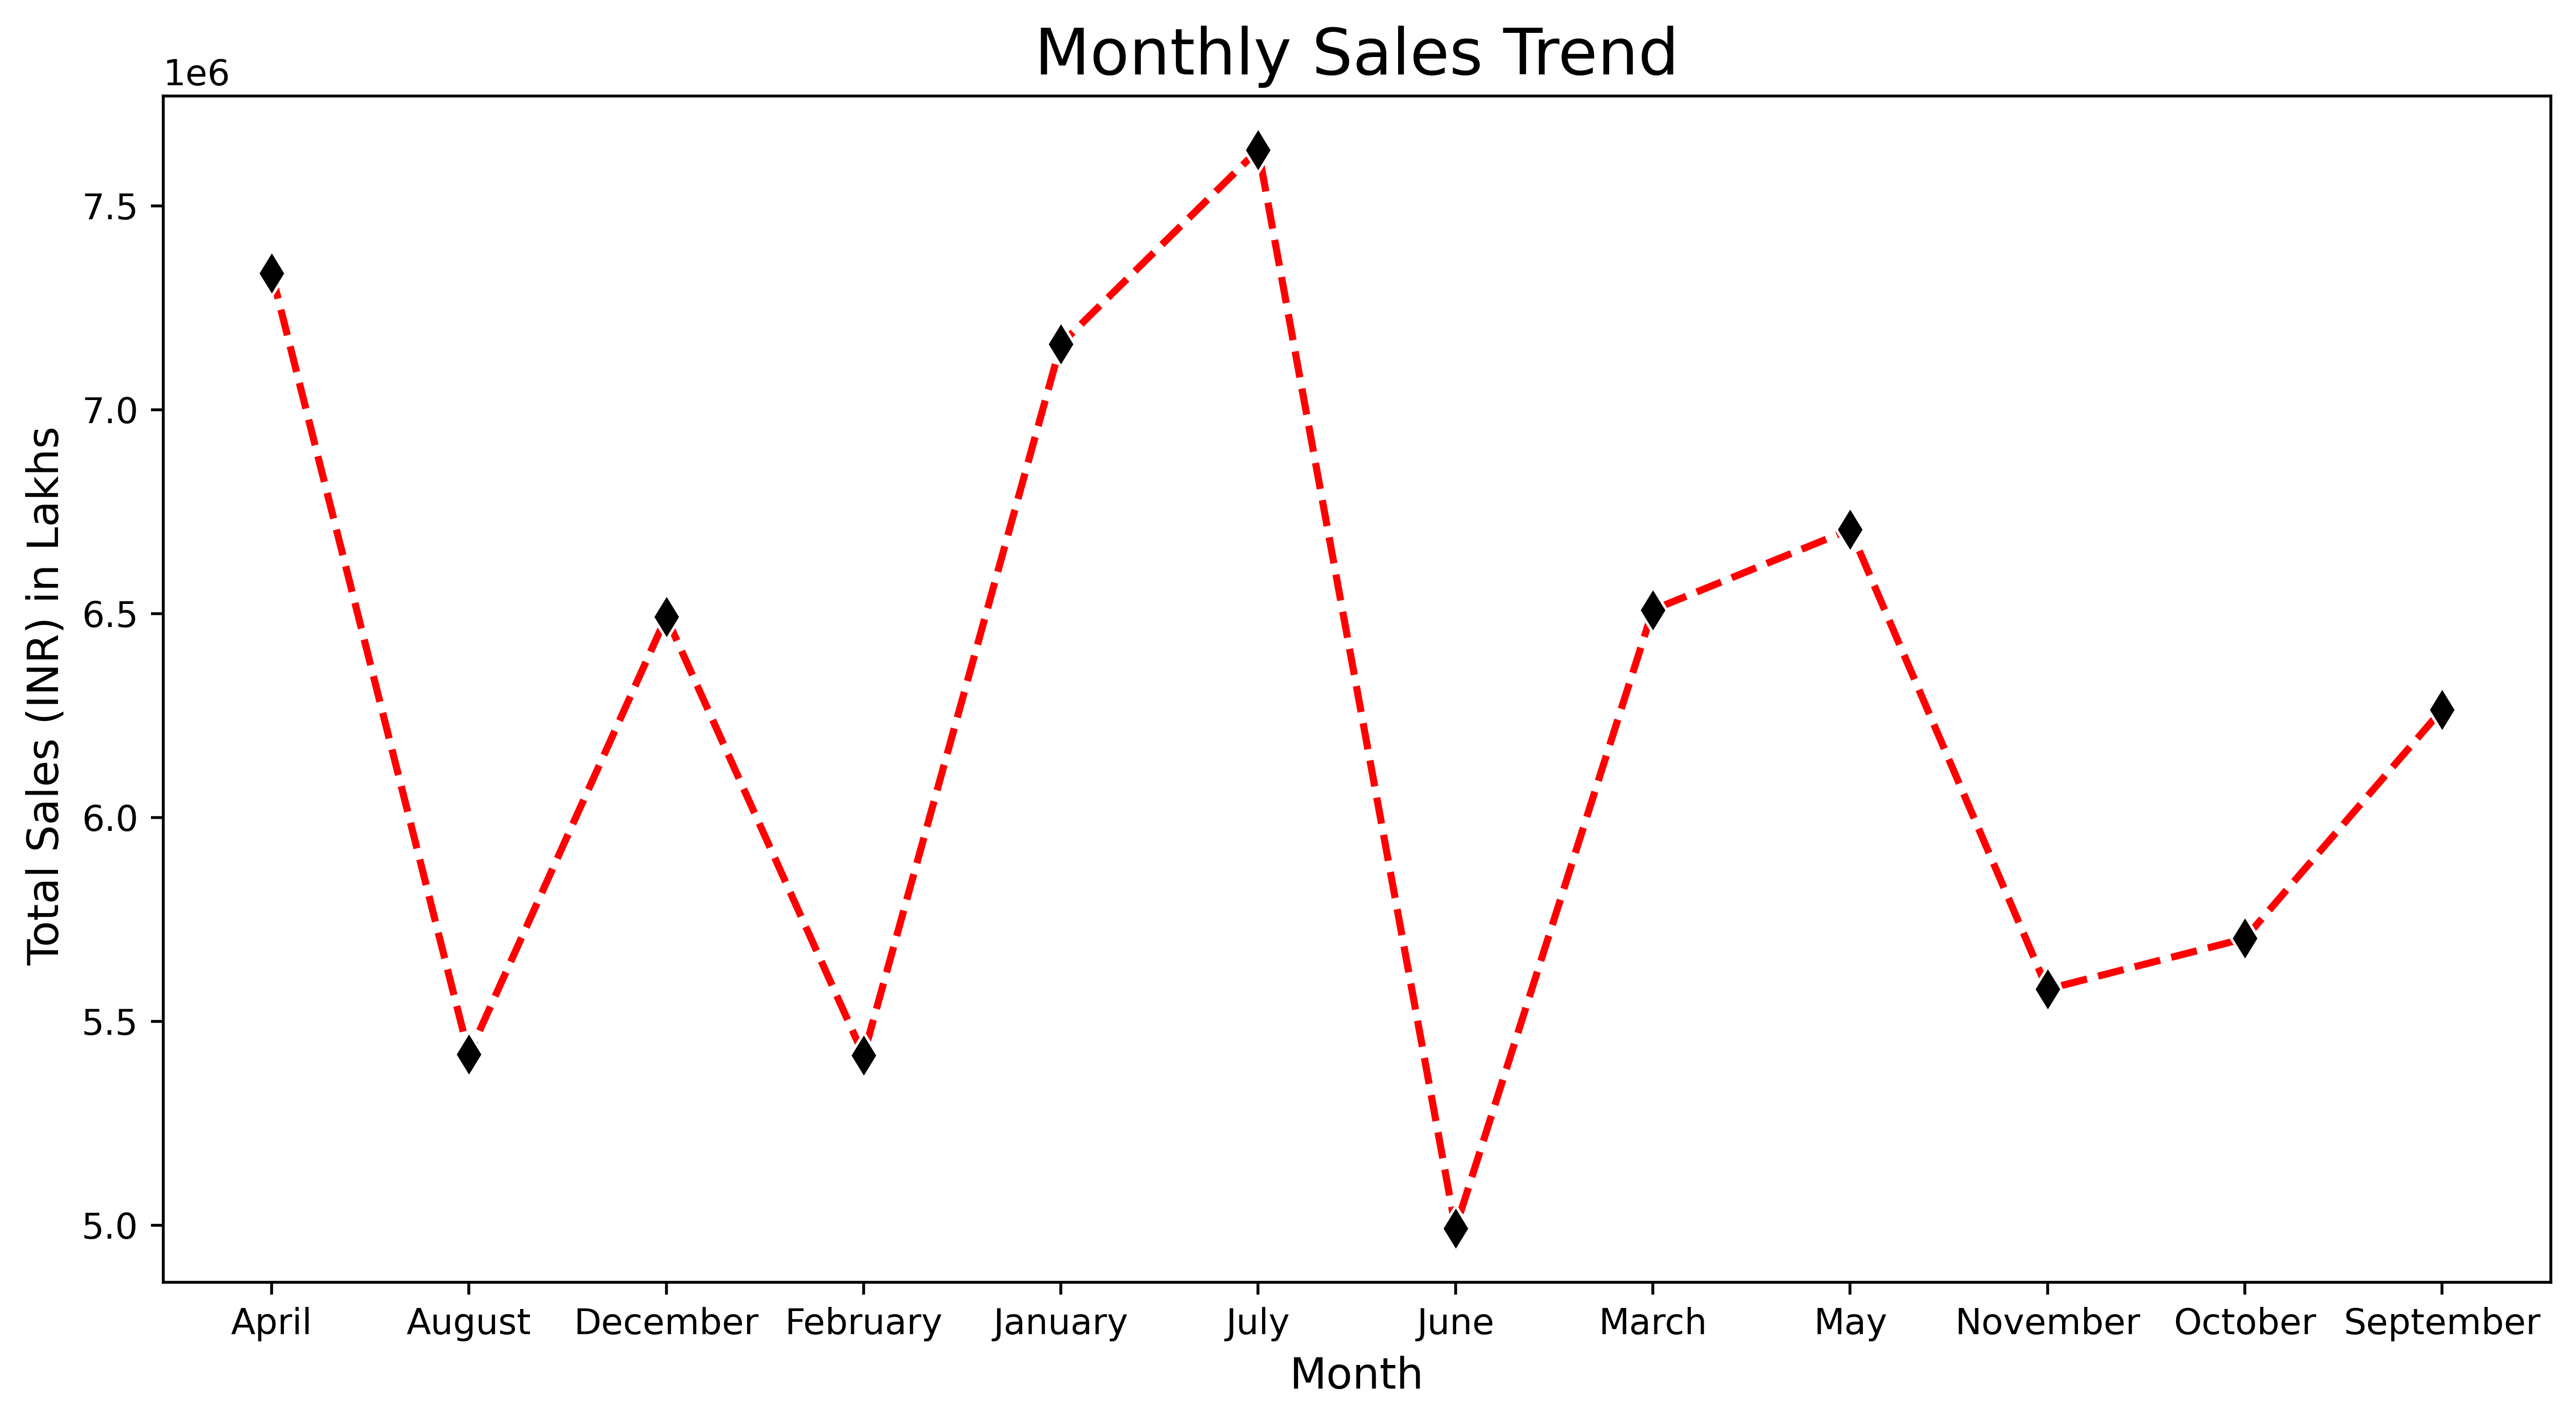

In [43]:
plt.figure(figsize=(12,6),dpi=500)
sns.lineplot(data=monthly_sales, x="Month", y="Total Sales (INR)", marker= 'd',markersize=9,markerfacecolor='black', color='red', linestyle='--', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (INR) in Lakhs ', fontsize=12);

In [24]:
df.head()

,Order ID,Product Name,Category,Price (INR),Quantity Sold,Total Sales (INR),Order Date,Payment Method,Customer Rating,year,Month
0,ORD00001,Educational Book,Books,49069.56,2,98139.12,2024-09-12,Debit Card,3.5,2024,September
1,ORD00002,Jeans,Clothing,12755.85,4,51023.40,2024-12-18,UPI,3.9,2024,December
2,ORD00003,Face Cream,Beauty,11092.19,4,44368.76,2024-05-18,Debit Card,4.4,2024,May
3,ORD00004,Smartwatch,Electronics,32657.81,1,32657.81,2024-11-08,Debit Card,3.2,2024,November
4,ORD00005,Cookware Set,Home & Kitchen,26590.08,3,79770.24,2024-12-27,UPI,3.1,2024,December


# Yearly_Sales

In [25]:
Yearly_sales = df.groupby('year')['Total Sales (INR)'].sum().reset_index()
Yearly_sales

,year,Total Sales (INR)
0,2024,66546228.37
1,2025,8666884.37


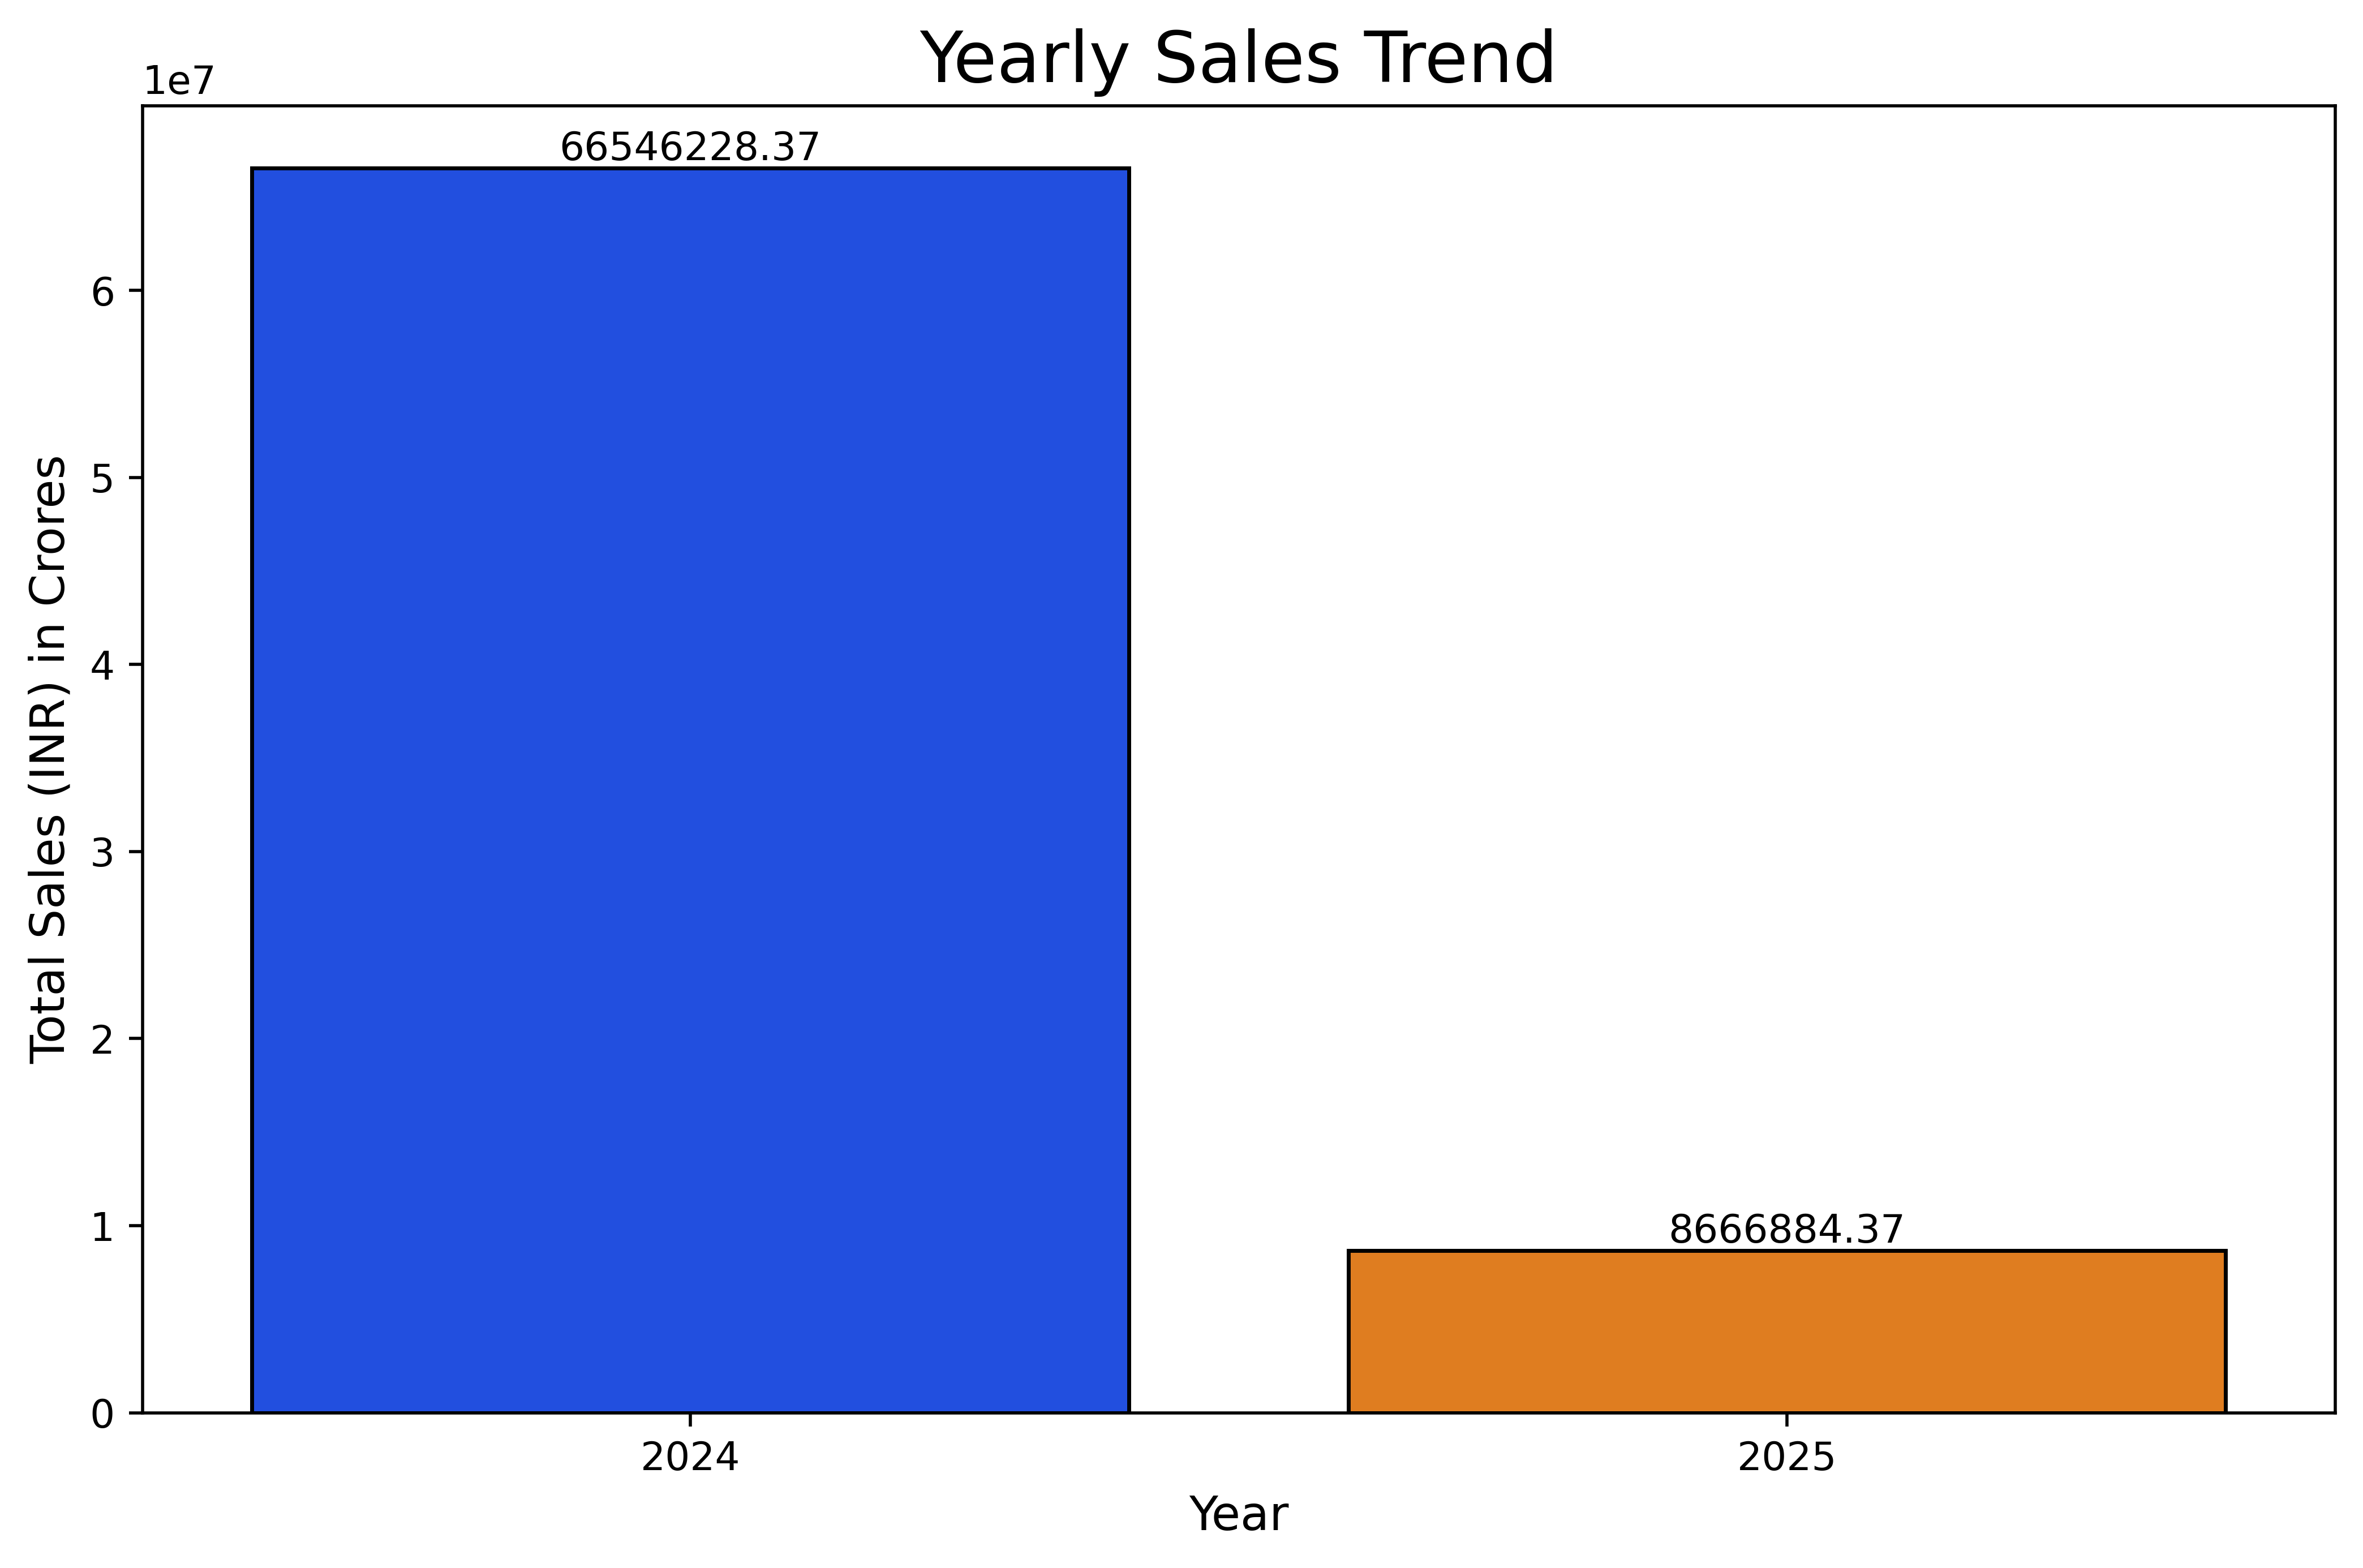

In [44]:
plt.figure(figsize=(10, 6),dpi=500)
for i, row in Yearly_sales.iterrows():
  plt.text(x=i, y=row['Total Sales (INR)'], s=f"{row['Total Sales (INR)']:.2f}", ha='center', va='bottom', fontsize=10, color='black')
sns.barplot(data=Yearly_sales,x='year', y='Total Sales (INR)', palette='bright', edgecolor='black')
plt.title('Yearly Sales Trend', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales (INR) in Crores', fontsize=12);
